# NBA Performance Analysis (2022-2023)
---

## Table of Content:
- Data Wrangling
- Data Visualization
- Data Analysis

<h1><font color="#2F5496">Data Wrangling</font></h1>

---
Transforming raw data from three different sources into a standardized format suitable for analysis
1. Flat File
2. API
3. Website
4. Data Merging

## 1. Flat File
---

### Introductory Phase:

In [129]:
#setup
import pandas as pd

#importing and loading the flat file (ff)
ff = pd.read_csv('2022-2023 NBA Player Stats.csv', encoding='ISO-8859-1', delimiter=';')
ff.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6


In [5]:
#displaying dataframe information
ff.info()

#key findings
    #rows: 553
    #non-missing values per column: 553
    #columns have consistent data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      553 non-null    int64  
 1   Player  553 non-null    object 
 2   Pos     553 non-null    object 
 3   Age     553 non-null    int64  
 4   Tm      553 non-null    object 
 5   G       553 non-null    int64  
 6   GS      553 non-null    int64  
 7   MP      553 non-null    float64
 8   FG      553 non-null    float64
 9   FGA     553 non-null    float64
 10  FG%     553 non-null    float64
 11  3P      553 non-null    float64
 12  3PA     553 non-null    float64
 13  3P%     553 non-null    float64
 14  2P      553 non-null    float64
 15  2PA     553 non-null    float64
 16  2P%     553 non-null    float64
 17  eFG%    553 non-null    float64
 18  FT      553 non-null    float64
 19  FTA     553 non-null    float64
 20  FT%     553 non-null    float64
 21  ORB     553 non-null    float64
 22  DR

In [6]:
#creating a copy of the original df to perform data cleaning/transformation tasks on the copy
ff_copy = ff.copy()

### Data Cleaning/Transformation #1: 
'Unique ID' column creation
- Column is needed as there are duplicate player names when players are traded mid-season in 'Player' column

In [134]:
#creating a column with Unique IDs
    #concatenating values from 'Player' & 'Tm' columns
ff_copy['Unique_ID'] = ff_copy['Player'] + '_' + ff_copy['Tm']
ff_copy.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unique_ID
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4,Precious Achiuwa_TOR
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,Steven Adams_MEM
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6,Bam Adebayo_MIA


### Data Cleaning/Transformation #2:
Duplicate audit

In [8]:
#checking for duplicates in the 'Unique_ID' column  
duplicate_ids = ff_copy.duplicated('Unique_ID')
num_duplicates = duplicate_ids.sum()
print("Number of duplicate IDs:", num_duplicates)

Number of duplicate IDs: 0


### Data Cleaning/Transformation #3:
Player binning based on 
- Points Per Game
- Rebounds Per Game 
- Assists Per Game

**Tier**: Low, Med, High

In [136]:
#POINTS:
#defining a function to categorize players into tiers based on their points per game stat ('pts' column)
#conditions:
    #Low_Tier: 0-10 
    #Med_Tier: 10.1-20 
    #High_Tier: 20.1 or higher
def pts_category(pts):
    if pts <= 10:
        return 'Low_Tier'
    elif pts <= 20:
        return 'Med_Tier'
    else:
        return 'High_Tier'

#applying the function to the 'PTS' column and creating a new column 'PTS_Tier'    
ff_copy['PTS_Tier'] = ff_copy['PTS'].apply(pts_category)

In [137]:
#REBOUNDS:
#defining a function to categorize players into tiers based on their rebounds per game stat ('trb' column)
#conditions:
    #Low_Tier: 0-5 
    #Med_Tier: 5.1-10 
    #High_Tier: 10.1 or higher
def trb_category(trb):
    if trb <= 5:
        return 'Low_Tier'
    elif trb <= 10:
        return 'Med_Tier'
    else:
        return 'High_Tier'

#applying the function to the 'TRB' column and creating a new column 'TRB_Tier'    
ff_copy['TRB_Tier'] = ff_copy['TRB'].apply(trb_category)

In [138]:
#ASSISTS:
#defining a function to categorize players based on their assists per game stat ('ast' column)
#conditions:
    #Low_Tier: 0-4 
    #Med_Tier: 4.1-8 
    #High_Tier: 8.1 or higher
def ast_category(ast):
    if ast <= 5:
        return 'Low_Tier'
    elif ast <= 10:
        return 'Med_Tier'
    else:
        return 'High_Tier'

#applying the function to the 'AST' column and creating a new column 'AST_Tier'    
ff_copy['AST_Tier'] = ff_copy['AST'].apply(ast_category)

In [139]:
#loading dataframe with newly added columns (PTS_Tier, TRB_Tier, AST_Tier)
ff_copy.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Unique_ID,PTS_Tier,TRB_Tier,AST_Tier
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,1.1,0.7,0.7,1.2,2.2,10.4,Precious Achiuwa_TOR,Med_Tier,Med_Tier,Low_Tier
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,2.3,0.9,1.1,1.9,2.3,8.6,Steven Adams_MEM,Low_Tier,High_Tier,Low_Tier
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,3.3,1.2,0.8,2.6,2.8,21.6,Bam Adebayo_MIA,High_Tier,High_Tier,Low_Tier


### Data Cleaning/Transformation #4:
Column removal

In [13]:
#dropping columns that are not needed for the project
ff_copy = ff_copy.drop(['2P','2PA','2P%','eFG%', '3P', '3PA', '3P%'], axis=1)

### Data Cleaning/Transformation #5:
Player Efficiency Rating (PER) Calculation
- PER Formula = (1 / MP) * (PTS + 0.42 * AST + 0.5 * TRB + 0.12 * STL + 0.12 * BLK - 0.72 * TOV)
    - Based on John Holligner's method
- Higher PER value indicates a more efficient player

In [140]:
#creating a new column ('PER') and calculating the Player Efficiency Rating 
ff_copy['PER'] = (1 / ff_copy['MP']) * (ff_copy['PTS'] + 0.42 * ff_copy['AST'] + 0.5 * ff_copy['TRB'] + 0.12 * ff_copy['STL'] + 0.12 * ff_copy['BLK'] - 0.72 * ff_copy['TOV'])
ff_copy.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Unique_ID,PTS_Tier,TRB_Tier,AST_Tier,PER
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.7,0.7,1.2,2.2,10.4,Precious Achiuwa_TOR,Med_Tier,Med_Tier,Low_Tier,0.581130
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.9,1.1,1.9,2.3,8.6,Steven Adams_MEM,Low_Tier,High_Tier,Low_Tier,0.525481
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,1.2,0.8,2.6,2.8,21.6,Bam Adebayo_MIA,High_Tier,High_Tier,Low_Tier,0.747989


### Concluding Phase:

In [118]:
#creating another copy of the df to use during the merging process
ff_final = ff_copy.copy()

## 2. API
---

### Introductory Phase:

In [18]:
#setup
import pandas as pd
import requests

In [19]:
#making a GET request to the API endpoint at 'Free NBA API Doc' 
url = "https://free-nba.p.rapidapi.com/teams"
headers = {
    "X-RapidAPI-Key": "ab01361aa0mshb1a477c479c4fe7p1c32c8jsn4c6ad2415b40",
    "X-RapidAPI-Host": "free-nba.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers)
response

#status code 200: request successful

<Response [200]>

In [21]:
#converting the json data into Python object via json()
data = response.json()

#displaying the keys (headers) for each dictionary in dataset
for team in data["data"]:
    print(team.keys())

dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abb

In [126]:
#converting the API data to pandas dataframe
    
#creating an empty list to store dictionaries
team_list = []

#creating a list of dictionaries containing: team_name, team_city, team_conference, team_division
    #starting a loop that will iterate through each team's data
for team in data["data"]:
    team_dict = {
        "Full_Name": team["full_name"],
        "Team_City": team["city"],
        "Team_Conference": team["conference"],
        "Team_Division": team["division"]
    }
    #adding 'team_dict' dictionary object to the 'team_list' list object
    team_list.append(team_dict)

#creating a df from 'team_list'
api = pd.DataFrame(team_list)
api.head(3)

,Full_Name,Team_City,Team_Conference,Team_Division
0,Atlanta Hawks,Atlanta,East,Southeast
1,Boston Celtics,Boston,East,Atlantic
2,Brooklyn Nets,Brooklyn,East,Atlantic


In [23]:
#creating a copy of the original df to perform data cleaning/transformation tasks on
api_copy = api.copy()

### Data Cleaning/Transformation #1:
For the 'Team_City' input for the Clippers and Lakers, change:
- From **LA** to **Los Angeles (C)**
- From **Los Angeles** to **Los Angeles (L)**

City name updated for uniformity

In [24]:
#displaying unique values from the 'Team City' column
print(api_copy['Team_City'].unique())

['Atlanta' 'Boston' 'Brooklyn' 'Charlotte' 'Chicago' 'Cleveland' 'Dallas'
 'Denver' 'Detroit' 'Golden State' 'Houston' 'Indiana' 'LA' 'Los Angeles'
 'Memphis' 'Miami' 'Milwaukee' 'Minnesota' 'New Orleans' 'New York'
 'Oklahoma City' 'Orlando' 'Philadelphia' 'Phoenix' 'Portland'
 'Sacramento' 'San Antonio' 'Toronto' 'Utah' 'Washington']


In [25]:
#replacing 'LA' to 'Los Angeles (C)'
api_copy['Team_City'].replace('LA', 'Los Angeles (C)', inplace=True)

#replacing 'Los Angeles' to 'Los Angeles (L)'
api_copy['Team_City'].replace('Los Angeles', 'Los Angeles (L)', inplace=True)

#displaying df to ensure the code ran correctly
api_copy.iloc[[12,13], :]

,Full_Name,Team_City,Team_Conference,Team_Division
12,LA Clippers,Los Angeles (C),West,Pacific
13,Los Angeles Lakers,Los Angeles (L),West,Pacific


### Data Cleaning/Transformation #2:
'City_Abbrev' column creation <br>
- Column is needed to link with other data sources

In [141]:
#creating a dictionary that contains the Team City name and its corresponding City Abbreviation
    #key: Team_City
    #value: City_Abbrev
city_dict = {
    'Atlanta': 'ATL',
    'Boston': 'BOS',
    'Brooklyn': 'BRK',
    'Chicago': 'CHI',
    'Charlotte': 'CHO',
    'Cleveland': 'CLE',
    'Dallas': 'DAL',
    'Denver': 'DEN',
    'Detroit': 'DET',
    'Golden State': 'GSW',
    'Houston': 'HOU',
    'Indiana': 'IND',
    'Los Angeles (C)': 'LAC',
    'Los Angeles (L)': 'LAL',
    'Memphis': 'MEM',
    'Miami': 'MIA',
    'Milwaukee': 'MIL',
    'Minnesota': 'MIN',
    'New Orleans': 'NOP',
    'New York': 'NYK',
    'Oklahoma City': 'OKC',
    'Orlando': 'ORL',
    'Philadelphia': 'PHI',
    'Phoenix': 'PHO',
    'Portland': 'POR',
    'Sacramento': 'SAC',
    'San Antonio': 'SAS',
    'Toronto': 'TOR',
    'Utah': 'UTA',
    'Washington': 'WAS'
}

#creating the 'City_Abbrev' column by: 
    #mapping the values of the 'Team_City' column to their corresponding values in the 'city_dict' dictionary
api_copy['City_Abbrev'] = api_copy['Team_City'].map(city_dict)
api_copy.head(3)

,Full_Name,Team_City,Team_Conference,Team_Division,City_Abbrev
0,Atlanta Hawks,Atlanta,East,Southeast,ATL
1,Boston Celtics,Boston,East,Atlantic,BOS
2,Brooklyn Nets,Brooklyn,East,Atlantic,BRK


### Data Cleaning/Transformation #3:
'Team_Name' column creation
- Column is needed to link with other data sources

In [142]:
#creating a new column by extracting the last word from each string in 'Full_Name' column
api_copy['Team_Name'] = api_copy['Full_Name'].str.split().str[-1]
api_copy.head(3)

,Full_Name,Team_City,Team_Conference,Team_Division,City_Abbrev,Team_Name
0,Atlanta Hawks,Atlanta,East,Southeast,ATL,Hawks
1,Boston Celtics,Boston,East,Atlantic,BOS,Celtics
2,Brooklyn Nets,Brooklyn,East,Atlantic,BRK,Nets


In [28]:
#removing whitespaces to ensure a smooth merging process
api_copy['Team_Name'] = api_copy['Team_Name'].str.strip()

### Data Cleaning/Transformation #4:
Dataset audit:
- Data types
- Null values

In [29]:
#displaying dataframe information
api_copy.info()

#key findings
    #rows: 30
    #non-missing values per column: 30
    #columns have consistent data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full_Name        30 non-null     object
 1   Team_City        30 non-null     object
 2   Team_Conference  30 non-null     object
 3   Team_Division    30 non-null     object
 4   City_Abbrev      30 non-null     object
 5   Team_Name        30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


### Concluding Phase:

In [119]:
#creating another copy of the df to use during the merging process
api_final = api_copy.copy()

## 3. Website
---

### Introductory Phase:
Extracting 2 tables from the Conference Standings section
- Eastern Conference table
- Western Conference table

In [31]:
#setup
import pandas as pd

#creating a url object for the link that I will be scraping from
url = 'https://www.basketball-reference.com/leagues/NBA_2023.html'

In [143]:
#EASTERN CONFERENCE EXTRACTION:
#reading in html table from url
web_eastern = pd.read_html(url, attrs={'id': 'confs_standings_E'})[0]

#renaming df columns to match the columns from the web
web_eastern.columns = ['Eastern_Conference', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']
web_eastern.head(3)

,Eastern_Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Milwaukee Bucks* (1),58,24,0.707,—,116.9,113.3,3.61
1,Boston Celtics* (2),57,25,0.695,1.0,117.9,111.4,6.38
2,Philadelphia 76ers* (3),54,28,0.659,4.0,115.2,110.9,4.37


In [144]:
#WESTERN CONFERENCE EXTRACTION:
#reading in html table from url
web_western = pd.read_html(url, attrs={'id': 'confs_standings_W'})[0]

#renaming df columns to match the columns from the web
web_western.columns = ['Western_Conference', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']
web_western.head(3)

,Western_Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Denver Nuggets* (1),53,29,0.646,—,115.8,112.5,3.04
1,Memphis Grizzlies* (2),51,31,0.622,2.0,116.9,113.0,3.60
2,Sacramento Kings* (3),48,34,0.585,5.0,120.7,118.1,2.30


In [34]:
#creating a copy of the original df to perform data cleaning/transformation tasks on
web_eastern_copy = web_eastern.copy()
web_western_copy = web_western.copy()

### Data Cleaning/Transformation #1:
'Conference' column creation

In [148]:
#creating a new column named 'Conference' and setting its value as 'Eastern' for all rows
web_eastern_copy['Conference'] = 'Eastern'
web_eastern_copy.head(3)

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern
2,Philadelphia 76ers,54,28,0.659,4.0,115.2,110.9,4.37,Eastern


In [150]:
#creating a new column named 'Conference' and setting its value as 'Western' for all rows
web_western_copy['Conference'] = 'Western'
web_western_copy.head(3)

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference
0,Denver Nuggets,53,29,0.646,—,115.8,112.5,3.04,Western
1,Memphis Grizzlies,51,31,0.622,2.0,116.9,113.0,3.60,Western
2,Sacramento Kings,48,34,0.585,5.0,120.7,118.1,2.30,Western


### Data Cleaning/Transformation #2:
Excess characters removal from **Eastern_Conference** & **Western_Conference** columns

In [37]:
#modifying values in the 'Eastern_Conference' column to be cleaner
    
#replacing '*' with an empty string
web_eastern_copy['Eastern_Conference'] = web_eastern_copy['Eastern_Conference'].str.replace('*', '')
#replacing '\(\d+\)' with an empty string
web_eastern_copy['Eastern_Conference'] = web_eastern_copy['Eastern_Conference'].str.replace('\(\d+\)', '')
web_eastern_copy.head()

C:\Users\josep\AppData\Local\Temp\ipykernel_11288\4062748512.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_eastern_copy['Eastern_Conference'] = web_eastern_copy['Eastern_Conference'].str.replace('*', '')
C:\Users\josep\AppData\Local\Temp\ipykernel_11288\4062748512.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  web_eastern_copy['Eastern_Conference'] = web_eastern_copy['Eastern_Conference'].str.replace('\(\d+\)', '')


,Eastern_Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern
2,Philadelphia 76ers,54,28,0.659,4.0,115.2,110.9,4.37,Eastern
3,Cleveland Cavaliers,51,31,0.622,7.0,112.3,106.9,5.23,Eastern
4,New York Knicks,47,35,0.573,11.0,116.0,113.1,2.99,Eastern


In [38]:
#modifying values in the 'Western_Conference' column to be cleaner
    
#replacing '*' with an empty string
web_western_copy['Western_Conference'] = web_western_copy['Western_Conference'].str.replace('*', '')
#replacing '\(\d+\)' with an empty string
web_western_copy['Western_Conference'] = web_western_copy['Western_Conference'].str.replace('\(\d+\)', '')
web_western_copy.head()

C:\Users\josep\AppData\Local\Temp\ipykernel_11288\2518958143.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_western_copy['Western_Conference'] = web_western_copy['Western_Conference'].str.replace('*', '')
C:\Users\josep\AppData\Local\Temp\ipykernel_11288\2518958143.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  web_western_copy['Western_Conference'] = web_western_copy['Western_Conference'].str.replace('\(\d+\)', '')


,Western_Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference
0,Denver Nuggets,53,29,0.646,—,115.8,112.5,3.04,Western
1,Memphis Grizzlies,51,31,0.622,2.0,116.9,113.0,3.60,Western
2,Sacramento Kings,48,34,0.585,5.0,120.7,118.1,2.30,Western
3,Phoenix Suns,45,37,0.549,8.0,113.6,111.6,2.08,Western
4,Los Angeles Clippers,44,38,0.537,9.0,113.6,113.1,0.31,Western


### Data Cleaning/Transformation #3:
'Standing' column creation

In [151]:
#EASTERN CONFERENCE:
#creating a new column by inputing sequence of numbers from 1-16
web_eastern_copy['Standing'] = range(1, 16)
web_eastern_copy.head(3)

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern,1
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern,2
2,Philadelphia 76ers,54,28,0.659,4.0,115.2,110.9,4.37,Eastern,3


In [152]:
#WESTERN CONFERENCE:
#creating a new column by inputing sequence of numbers from 1-16
web_western_copy['Standing'] = range(1, 16)
web_western_copy.head(3)

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing
0,Denver Nuggets,53,29,0.646,—,115.8,112.5,3.04,Western,1
1,Memphis Grizzlies,51,31,0.622,2.0,116.9,113.0,3.60,Western,2
2,Sacramento Kings,48,34,0.585,5.0,120.7,118.1,2.30,Western,3


### Data Cleaning/Transformation #4:
Table merging

In [153]:
#changing the column name from 'Eastern_Conference' to 'Team'
web_eastern_copy = web_eastern_copy.rename(columns = {'Eastern_Conference': 'Full_Name'}) 
#changing the column name from 'Western_Conference' to 'Team'
web_western_copy = web_western_copy.rename(columns = {'Western_Conference': 'Full_Name'})

#concatenating our two dataframes
web_copy = pd.concat([web_eastern_copy, web_western_copy], axis=0)
#reseting index
web_copy = web_copy.reset_index(drop=True)
web_copy.iloc[[0,1,15,16], :]

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern,1
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern,2
15,Denver Nuggets,53,29,0.646,—,115.8,112.5,3.04,Western,1
16,Memphis Grizzlies,51,31,0.622,2.0,116.9,113.0,3.60,Western,2


### Data Cleaning/Transformation #5:
'Team_Name' column creation
- Column is needed to link with other data sources

In [154]:
#creating a new column by extracting the last word from each string in 'Full_Name' column
web_copy['Team_Label'] = web_copy['Full_Name'].str.split(' ').str[-1]
web_copy.head(3)

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing,Team_Label
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern,1,Bucks
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern,2,Celtics
2,Philadelphia 76ers,54,28,0.659,4.0,115.2,110.9,4.37,Eastern,3,76ers


In [43]:
#removing whitespaces to ensure a smooth merging process
web_copy['Team_Label'] = web_copy['Team_Label'].str.strip()

### Concluding Phase:

In [120]:
#creating another copy of the df to use during the merging process
web_final = web_copy.copy()

## 4. Data Merging
---

### Merging Process #1:
Joining **ff_final** & **api_final**

In [155]:
#performing left join operation based on
    #'ff_final' - 'Tm' column
    #'api_final' - 'City_Abbrev' column
merged_df = pd.merge(ff_final, api_final[['Full_Name', 'Team_City', 'Team_Conference', 'Team_Division', 'Team_Name','City_Abbrev']], 
                         left_on='Tm', right_on='City_Abbrev', how='left')
merged_df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PTS_Tier,TRB_Tier,AST_Tier,PER,Full_Name,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,Med_Tier,Med_Tier,Low_Tier,0.581130,Toronto Raptors,Toronto,East,Atlantic,Raptors,TOR
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,Low_Tier,High_Tier,Low_Tier,0.525481,Memphis Grizzlies,Memphis,West,Southwest,Grizzlies,MEM
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,High_Tier,High_Tier,Low_Tier,0.747989,Miami Heat,Miami,East,Southeast,Heat,MIA


### Merging Process #2:
Joining **merged_df** & **web_final**

In [156]:
#performing left join operation based on
    #'merged_df' -> 'Team_Name' column
    #'web_final' -> 'Team_Label' column
merged_df = pd.merge(merged_df, web_final[['W', 'L', 'W/L%', 'Standing', 'Team_Label']],
                         left_on='Team_Name', right_on='Team_Label', how='left')
merged_df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev,W,L,W/L%,Standing,Team_Label
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,Toronto,East,Atlantic,Raptors,TOR,41.0,41.0,0.500,9.0,Raptors
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,Memphis,West,Southwest,Grizzlies,MEM,51.0,31.0,0.622,2.0,Grizzlies
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,Miami,East,Southeast,Heat,MIA,44.0,38.0,0.537,7.0,Heat


### Data Cleaning/Transformation #1:
Missing value adjustment

In [122]:
#displaying dataframe information
merged_df.info()

#key findings
    #rows: 553
    #non-missing values per column: 528
    #28-38: contains null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 552
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               553 non-null    int64  
 1   Player           553 non-null    object 
 2   Pos              553 non-null    object 
 3   Age              553 non-null    int64  
 4   Tm               553 non-null    object 
 5   G                553 non-null    int64  
 6   GS               553 non-null    int64  
 7   MP               553 non-null    float64
 8   FG               553 non-null    float64
 9   FGA              553 non-null    float64
 10  FG%              553 non-null    float64
 11  FT               553 non-null    float64
 12  FTA              553 non-null    float64
 13  FT%              553 non-null    float64
 14  ORB              553 non-null    float64
 15  DRB              553 non-null    float64
 16  TRB              553 non-null    float64
 17  AST             

In [157]:
#identifying rows with null values in specific columns
null_rows = merged_df[merged_df[['Full_Name', 'Team_City', 'Team_Conference', 'Team_Division', 'Team_Name', 'City_Abbrev', 'W', 'L', 'W/L%', 'Standing', 'Team_Label']].isnull().any(axis=1)]
null_rows.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev,W,L,W/L%,Standing,Team_Label
5,6,Nickeil Alexander-Walker,SG,24,TOT,37,3,14.3,2.2,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,36,Malik Beasley,SG,26,TOT,56,13,26.6,4.8,12.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,57,Mikal Bridges,SF,26,TOT,57,57,36.4,6.4,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#returning unique values in 'Tm' column
merged_df['Tm'].unique()

array(['TOR', 'MEM', 'MIA', 'UTA', 'TOT', 'MIN', 'MIL', 'CLE', 'NOP',
       'ORL', 'NYK', 'WAS', 'PHO', 'DET', 'GSW', 'CHO', 'SAS', 'SAC',
       'LAC', 'OKC', 'LAL', 'DAL', 'IND', 'ATL', 'CHI', 'DEN', 'BRK',
       'BOS', 'POR', 'PHI', 'HOU'], dtype=object)

**Null Value Findings**: 
- During the merging process of 'ff_final' and 'api_final', 24 rows encountered an incomplete join due to the presence of the value 'TOT' in the 'Tm' column, which did not match any values in the 'Team_City' column

- Further investigation revealed that 'TOT' represents 'more than one team'. This is applied to players who have played for  multiple teams during the 22-23 season

- Therefore, the 24 rows containing null values will be removed as they are NOT needed in the dataset

In [49]:
#removing rows with null values
merged_df = merged_df.dropna()
merged_df.info()

#key findings
    #rows: 528
    #non-missing values per column: 528

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 552
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               528 non-null    int64  
 1   Player           528 non-null    object 
 2   Pos              528 non-null    object 
 3   Age              528 non-null    int64  
 4   Tm               528 non-null    object 
 5   G                528 non-null    int64  
 6   GS               528 non-null    int64  
 7   MP               528 non-null    float64
 8   FG               528 non-null    float64
 9   FGA              528 non-null    float64
 10  FG%              528 non-null    float64
 11  FT               528 non-null    float64
 12  FTA              528 non-null    float64
 13  FT%              528 non-null    float64
 14  ORB              528 non-null    float64
 15  DRB              528 non-null    float64
 16  TRB              528 non-null    float64
 17  AST             

<h1><font color="#2F5496">Data Visualization</font></h1>

---
1. Bar Plot - Points per Game by Player
2. Scatter Plot - Points per Game vs. Minutes Played
3. Box Plot - Minutes Played by Position
4. Pie Chart - Distribution of Positions
5. Player Count by Points / Rebound / Assist Tier

### Introductory Phase:

In [134]:
#setup
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Bar Plot - Points per Game by Player
---
Creating a bar plot of the top 5 players with the highest points per game

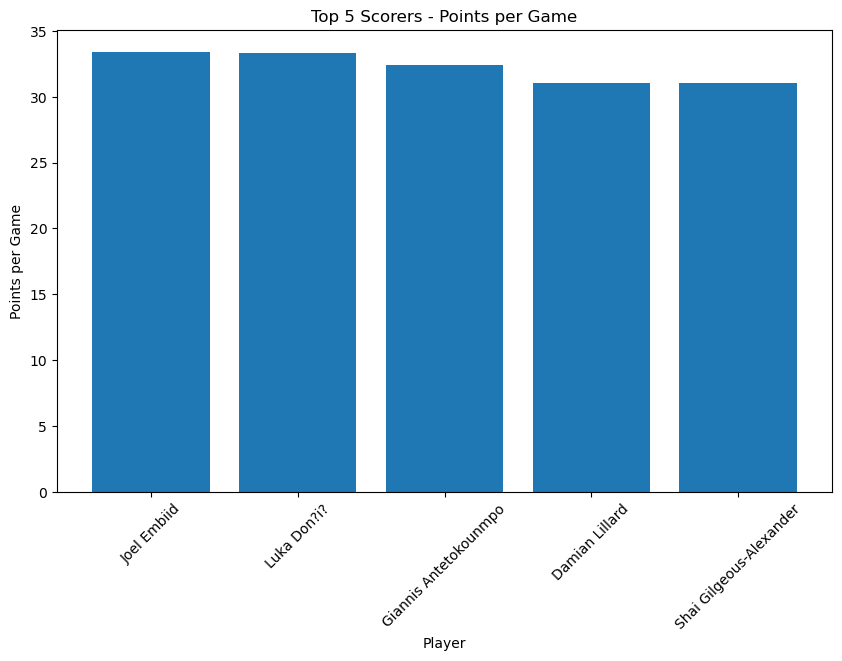

In [144]:
#sorting the dataframe by points per game in descending order
sorted_df = merged_df.sort_values(by='PTS', ascending=False)

#displaying the top 5 scorers
top_scorers = sorted_df.head(5)

#creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Player'], top_scorers['PTS'])
plt.xlabel('Player')
plt.ylabel('Points per Game')
plt.title('Top 5 Scorers - Points per Game')
plt.xticks(rotation=45)

plt.show()

**Result**:

    Top players based on points per game
    1. Joel Embiid
    2. Luka Doncic
    3. Giannis Antetokounmpo
    4. Damian Lillard
    5. Shai Gilgeous-Alexander

## 2. Scatter Plot - Points per Game vs. Minutes Played
---
Visualizing the relationship between points scored and playing time using a scatter plot

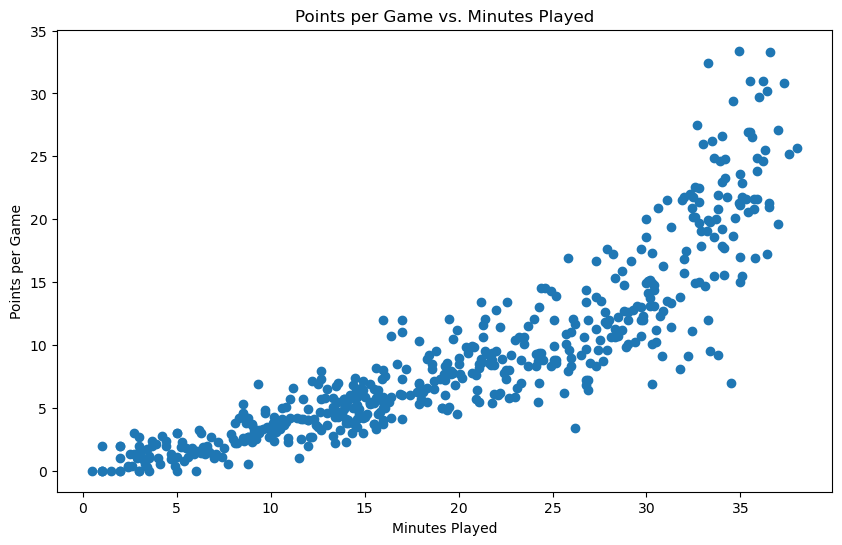

In [136]:
#creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['MP'], merged_df['PTS'])
plt.xlabel('Minutes Played')
plt.ylabel('Points per Game')
plt.title('Points per Game vs. Minutes Played')

plt.show()

**Result**: The scatter plot reveals a positive correlation between minutes played and points scored, suggesting that more playing time corresponds to higher point totals

## 3. Box Plot - Minutes Played by Position
---
Creating a box plot to compare the distribution of minutes played for each position

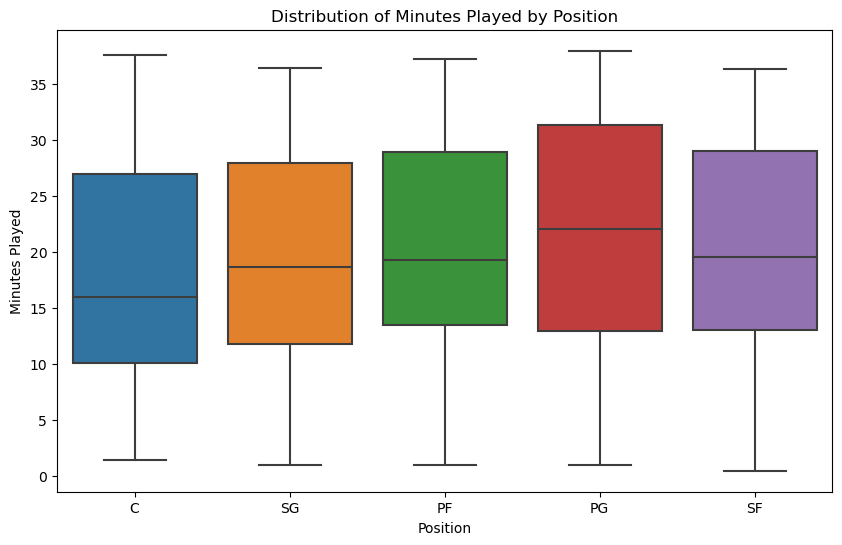

In [137]:
#creating a box plot:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='MP', data=merged_df)
plt.xlabel('Position')
plt.ylabel('Minutes Played')
plt.title('Distribution of Minutes Played by Position')

plt.show()

**Result**: 

    Top position ranking based on minutes distribution
    1. Point Guard
    2. Small Forward
    3. Power Foward
    4. Shooting Guard
    5. Center

**Insight**: The chart illustrates a shift in the NBA from a center-dominated league in the 90s-2000s to a small-ball style where point guards play a crucial role in controlling the game.

## 4. Pie Chart - Distribution of Positions
---
Creating a pie chart to show the distribution of players across different positions in the NBA

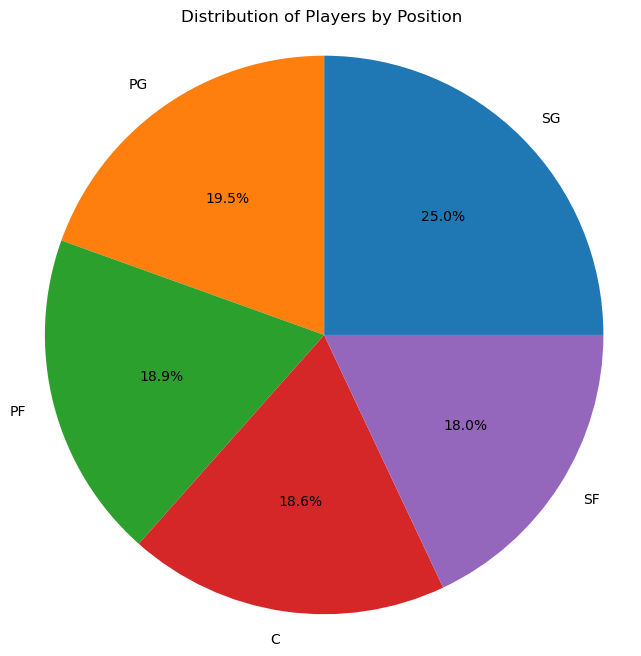

In [138]:
#calculating the count of players in each position
position_counts = merged_df['Pos'].value_counts()

#creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Players by Position')
plt.axis('equal')

plt.show()

**Result**: 

    Top position ranking based on player distribution
    1. Shooting Guard
    2. Point Guard
    3. Power Forward
    4. Center
    5. Small Foward

**Insight**: 
- Similar to our box chart insight, the chart highlights that shooting guards and point guards hold the highest representation among the top positions, reflecting a preference for guard-oriented play styles that prioritize scoring and playmaking abilities.
- Despite shooting guards ranking first in terms of player distribution, they rank fourth in terms of minutes played. This suggests that while shooting guards may be numerous in the league, they may not receive as much playing time as other positions.

## 5. Player Count by Points / Rebound / Assist Tier
---
Creating 3 bar graphs to visualize the distribution of players across different stats and tiers

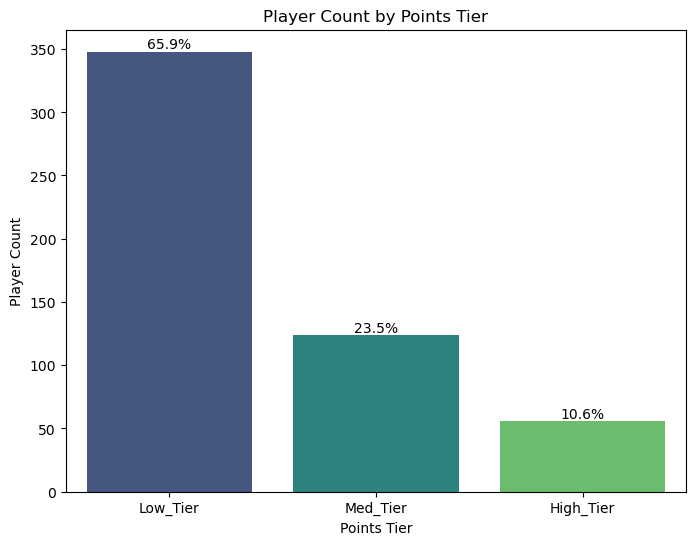

In [151]:
#POINTS:
#counting the number of players in each points tier
tier_counts = merged_df['PTS_Tier'].value_counts()

#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()

#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100

#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Points Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Points Tier')

#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
    
plt.show()

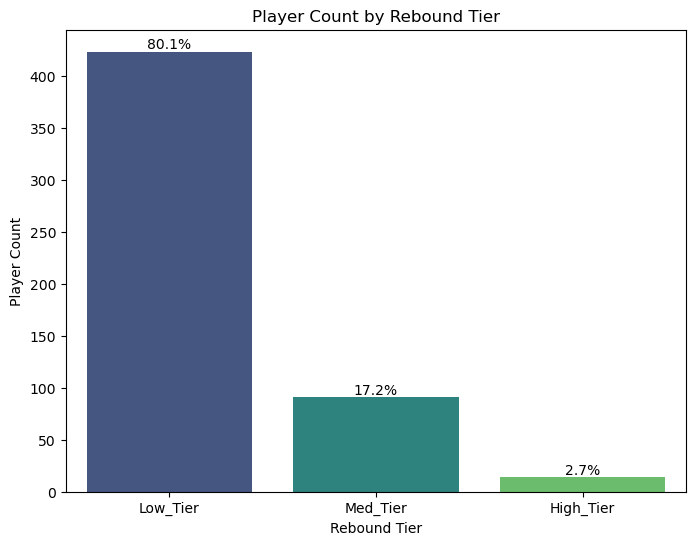

In [153]:
#REBOUNDS:
#counting the number of players in each rebound tier
tier_counts = merged_df['TRB_Tier'].value_counts()

#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()

#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100

#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Rebound Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Rebound Tier')

#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
    
plt.show()

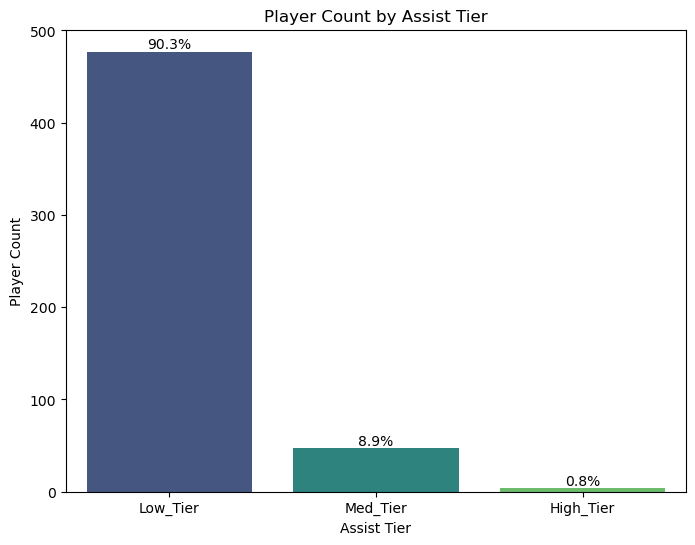

In [154]:
#ASSISTS:
#counting the number of players in each Assist tier
tier_counts = merged_df['AST_Tier'].value_counts()

#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()

#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100

#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Assist Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Assist Tier')

#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
    
plt.show()

**Result**: All three bar graphs indicate that there is a larger proportion of players with lower statistics in each category, while a smaller percentage of players excel in higher tiers

**Insight**: 
- Becoming an all-around player in the NBA is a significant challenge, as it requires achieving a high-tier percentile in each category
    - Points: 10.6%
    - Rebound: 2.7%
    - Assist: 0.8%
- % of being an all-around player formula = Points high-tier percentile * Rebound high-tier percentile * Assist high-tier percentile
    - **% of being an all-around player** = 0.0022%

<h1><font color="#2F5496">Data Analysis</font></h1>

---
1. Team PER Analysis
2. Player PER Analysis

### Introductory Phase:

In [73]:
#creating another copy of the df to use during the analysis process
merged_analysis = merged_df.copy()

## 1. Team PER Analysis
---
- Analyzing the avg PER values for each team to assess team performance and identify teams with the highest-performing players
- Comparing the avg PER values to team win-loss records to assess the relationship between player efficiency and team success

**Note**: Filtering out players with fewer than or equal to 10 games from the analysis to ensure a more accurate representation of the average PER.

In [104]:
#filtering players with more than 10 games
filtered_df = merged_analysis[merged_analysis['G'] > 10]

#calculating avg PER for each team
team_per_avg = filtered_df.groupby('Team_Name')['PER'].mean().reset_index()
team_per_avg = team_per_avg.rename(columns={'Team_Name': 'Team_Label'})

#calculating total wins and losses for each team
team_wins = web_copy.groupby('Team_Label')['W'].sum().reset_index()
team_losses = web_copy.groupby('Team_Label')['L'].sum().reset_index()

#merging average PER, wins, and losses dataframes
team_stats = pd.merge(team_per_avg, team_wins, on='Team_Label')
team_stats = pd.merge(team_stats, team_losses, on='Team_Label')

#calculating win percentage
team_stats['Win_%'] = team_stats['W'] / (team_stats['W'] + team_stats['L'])

In [105]:
#PER:
#sorting teams based on average PER in descending order
team_stats = team_stats.sort_values('PER', ascending=False)
team_stats.head()

,Team_Label,PER,W,L,Win_%
20,Pelicans,0.566039,42,40,0.512195
28,Warriors,0.564801,44,38,0.536585
25,Suns,0.560464,45,37,0.548780
27,Timberwolves,0.551126,42,40,0.512195
7,Grizzlies,0.548955,51,31,0.621951


In [106]:
#WIN_%:
#sorting teams based on average Win_% in descending order
team_stats = team_stats.sort_values('Win_%', ascending=False)
team_stats.head()

,Team_Label,PER,W,L,Win_%
2,Bucks,0.510638,58,24,0.707317
5,Celtics,0.512310,57,25,0.695122
0,76ers,0.526617,54,28,0.658537
18,Nuggets,0.526003,53,29,0.646341
4,Cavaliers,0.495800,51,31,0.621951


**Observation**: Best performing teams in two categories

    Top 5 Team by Player Efficiency Rating (PER) 
    1. Pelicans
    2. Warriors
    3. Suns
    4. Timberwolves
    5. Grizzlies

These teams have players who, on average, demonstrate high efficiency and productivity on the court

    Top 5 Team by WIN_%
    1. Bucks
    2. Celtics
    3. 76ers
    4. Nuggets
    5. Cavaliers

These teams have performed well in terms of their win-loss records throughout the season

**Analysis:**
Taking our two rankings into consideration, it looks like there is no direct correlation between player efficiency (PER) and team success (win-loss records). This suggests:
- Individual PER does not directly translate to team success
- Team success is not solely dependent on individual PER
- Overall NBA sucess is influenced by other factors beyond PER, such as team chemistry, coaching strategies, and overall roster depth

## 2. Player PER Analysis
---
- Ranking players based on their PER values to identify the top performers in terms of overall efficiency

**Note**: Filtering out players with fewer than or equal to 10 games from the analysis to ensure a more accurate representation of the average PER.

In [115]:
#filtering out players with less than or equal to 10 games
filtered_players = merged_analysis[merged_analysis['G'] > 10]

#ranking players based on PER values
ranked_players = filtered_players.sort_values('PER', ascending=False).reset_index(drop=True)

#creating a new column 'Rank' with player rankings
ranked_players['Rank'] = ranked_players.index + 1

#selecting the desired columns
ranked_players = ranked_players[['Rank', 'Player', 'PER', 'Pos', 'Age', 'Tm', 'Team_Conference', 'Full_Name', 'PTS_Tier', 'TRB_Tier', 'AST_Tier']]
ranked_players.head(10)

,Rank,Player,PER,Pos,Age,Tm,Team_Conference,Full_Name,PTS_Tier,TRB_Tier,AST_Tier
0,1,Giannis Antetokounmpo,1.145045,PF,28,MIL,East,Milwaukee Bucks,High_Tier,High_Tier,Med_Tier
1,2,Joel Embiid,1.086304,C,28,PHI,East,Philadelphia 76ers,High_Tier,High_Tier,Low_Tier
2,3,Luka Don?i?,1.059290,PG,23,DAL,West,Dallas Mavericks,High_Tier,Med_Tier,Med_Tier
3,4,LeBron James,0.970824,PF,38,LAL,West,Los Angeles Lakers,High_Tier,Med_Tier,Med_Tier
4,5,Nikola Joki?,0.966964,C,27,DEN,West,Denver Nuggets,High_Tier,High_Tier,High_Tier
5,6,Ja Morant,0.963303,PG,23,MEM,West,Memphis Grizzlies,High_Tier,Med_Tier,Med_Tier
6,7,Anthony Davis,0.959701,C,29,LAL,West,Los Angeles Lakers,High_Tier,High_Tier,Low_Tier
7,8,Stephen Curry,0.956705,PG,34,GSW,West,Golden State Warriors,High_Tier,Med_Tier,Med_Tier
8,9,Shai Gilgeous-Alexander,0.956113,PG,24,OKC,West,Oklahoma City Thunder,High_Tier,Low_Tier,Med_Tier
9,10,Jayson Tatum,0.941501,PF,24,BOS,East,Boston Celtics,High_Tier,Med_Tier,Low_Tier


**Observation**:

    Top NBA superstars per PER
    1. Giannis Antetokounmpo
    2. Joel Embiid
    3. Luka Doncic
    4. Lebron James
    5. Nikola Jokic

**Analysis**:

- The top performers consists of various positions, including power forward (PF), center (C), and point guard (PG). This demonstrates that player efficiency is not limited to a specific position but rather depends on individual skills and playing styles

- The player ranking indicates the age of each player, ranging from 23 to 38 years old. It showcases that both young talents and experienced veterans can excel in terms of efficiency and productivity

- All top performers have logged in 'High_Tier' in the 'PTS_Tier' column, indicating that being a proficient scorer is a key characteristic of a franchise player in the league

- The majority of the NBA's top performers are from the Western Conference
